In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
word_index=reuters.get_word_index()

In [6]:
reversed_index=dict([(value,key) for (key,value) in word_index.items()])

In [7]:
decoded_newswires=' '.join([reversed_index.get(i-3,'?') for i in train_data[0]])

In [8]:
train_labels[15]

8

Vectorizing the Data

In [9]:
import numpy as np
def vectorized_data(sequences,dimension=10000):
    results= np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results
x_train =  vectorized_data(train_data)
y_train = vectorized_data(test_data)

another way

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

built in method of to_one_hot

In [11]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Model

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Training the model

In [15]:
history=model.fit(partial_x_train,
                  partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val)
                    )

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 264us/step - loss: 2.7281 - accuracy: 0.4830 - val_loss: 1.7934 - val_accuracy: 0.6380
Epoch 2/20
7982/7982 [==============================] - 2s 242us/step - loss: 1.4695 - accuracy: 0.6946 - val_loss: 1.3211 - val_accuracy: 0.7070
Epoch 3/20
7982/7982 [==============================] - 2s 223us/step - loss: 1.0734 - accuracy: 0.7681 - val_loss: 1.1398 - val_accuracy: 0.7510
Epoch 4/20
7982/7982 [==============================] - 2s 228us/step - loss: 0.8425 - accuracy: 0.8201 - val_loss: 1.0452 - val_accuracy: 0.7730
Epoch 5/20
7982/7982 [==============================] - 2s 231us/step - loss: 0.6664 - accuracy: 0.8578 - val_loss: 0.9609 - val_accuracy: 0.8020
Epoch 6/20
7982/7982 [==============================] - 2s 217us/step - loss: 0.5308 - accuracy: 0.8882 - val_loss: 0.9153 - val_accuracy: 0.8100
Epoch 7/20
7982/7982 [======

Plotting the training and validation loss

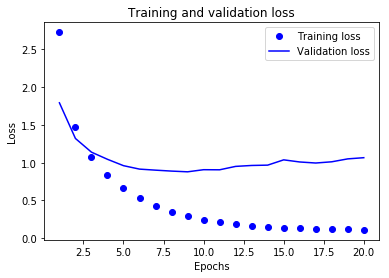

In [23]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

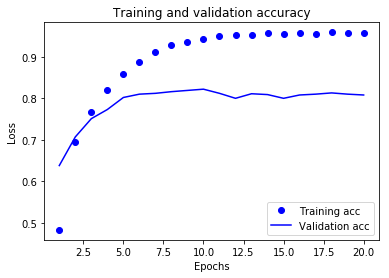

In [20]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()